# 104人力銀行網站爬蟲練習
## 從104人力銀行網站爬取求職公司資訊。

In [1]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 首先進入104人力銀行網站：https://www.104.com.tw/cust/list/index/
### 在"地區"及"產業"下拉式選單中，選擇你希望的選項，然後按下"找公司"按鈕。

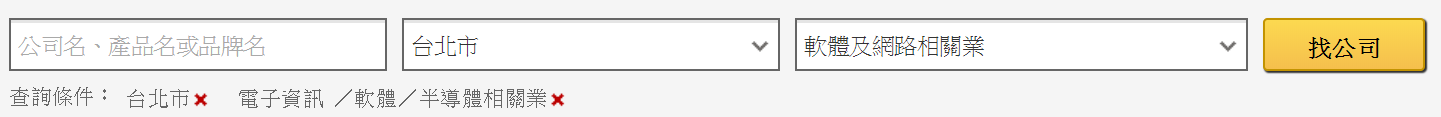

### 開啟新網頁後，觀察新的網址內容，把網址複製下來。

In [2]:
job_104_url = "https://www.104.com.tw/cust/list/index/?page=1&order=1&mode=s&jobsource=checkc&area=6001001000&indcat=1001002000"

### 開始爬取搜尋結果

In [12]:
browser = webdriver.Chrome(executable_path='C:/Users/peter/Dropbox/chromedriver.exe')
browser.get(job_104_url)  # 打開瀏覽器並連到網頁
time.sleep(2)  # delay一段時間等待網頁更新完成
new_click=''

while True:
    time.sleep(3)  # delay一段時間等待網頁更新完成
    html = browser.page_source
    soup = BeautifulSoup(html, 'lxml')
    company_list = soup.find("div", attrs={'id':"company-result"}).find_all("article", attrs={'class':"items"})
    
    #
    # 擷取公司名稱及簡介內容
    #
    for company in company_list:
        # 因為內容太多，我們把爬取到的結果，寫入"company_list.txt"檔案中，稍後再來檢視
        company_name = company.a.string
        f = open("company_list.txt", "a+", encoding='utf-8')
        f.write( company_name + "\n" )  # 寫入公司名稱
        
        company_desc = company.find("p", attrs={'class':"desc"})
        f.write( company_desc.string + "\n" )  # 寫入公司簡介
        f.write( "--------------------------------------------------------------------------------" + "\n" )
        f.close()

    '''
    
    接下來請學員練習，定位到「下一頁」按鈕。(可以利用find_element_by_link_text("xxx")的函式)
    如果還有下一頁，利用Selenium模擬click「下一頁」按鈕的動作。(定位到物件後，利用其click()屬性)
    若沒有下一頁了，離開爬取的流程
    
    Your code here
    
    '''
    new_page=browser.find_element_by_link_text('下一頁')
    if new_click==new_page:
        break
    new_click=new_page
    new_click.click()
f = open("company_list.txt", "r", encoding='utf-8')
print(f.read())
f.close()

台灣小米通訊有限公司
［小米不是單純的硬體公司，我們是創新驅動的互聯網公司］
小米集團成立於2010年4月，2018年7月9日在香港交易所主板掛牌上市（1810.HK），是一家以手機、智慧裝置和 IoT 平台為核心的互聯網公司。

胸懷「和用戶交朋友，做用戶...
--------------------------------------------------------------------------------
泓博無線通訊技術有限公司
泓淋科技集團是專為3C及汽車领域客户提供無線有線訊號連接產品和特種電纜及組件產品的集團公司
集團一直致力於研發實力的提升，能為客户提供一流的設計方案，先后成立高頻訊號傳輸技術研究中心，高分子材料研究中心，天線研發中...
--------------------------------------------------------------------------------
速連通訊股份有限公司
SparkLAN Communication is a company headquartered in Taipei Taiwan. Founded in 2002, we devote in the wireless and broadband communication field, and have become one of the leaders in wireless networking solution ...
--------------------------------------------------------------------------------
南訊企業股份有限公司
南訊企業股份有限公司創立於1981年，為國內知名的專業代理廠商，其代理產品有全球領導廠商的Avaya通訊設備、Mitel通訊平台、Microsoft通訊方案及全球市佔率前兩大的錄音系統解決方案NICE與Verint。我們所有的技術團隊均通過原廠的...
--------------------------------------------------------------------------------
皇家電訊科技有限公司
本公司於民國83年開業至今，規模由員工2~3人發展至今有100人以上的規模。
由當初